### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
row_mean = np.zeros(3)
col_mean = np.zeros(4)

for (i, j) in zip(range(3), range(4)):
    row_mean[i] = np.mean(m[i, :])
    col_mean[j] = np.mean(m[:, j])

#rowm = np.array([np.mean(x) for x in m[,:]])

total_mean = np.mean(m)

print(m)
print(row_mean)
print(col_mean)
print(total_mean)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[1.5 5.5 9.5]
[4. 5. 6. 0.]
5.5


In [3]:
import numpy as np

m = np.arange(12).reshape((3,4))
rmean = m.mean(axis=1)
cmean = m.mean(axis=0)
omean = m.mean()

print(rmean, cmean, omean)


[1.5 5.5 9.5] [4. 5. 6. 7.] 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [11]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

nproduct = np.outer(u, v)
print(nproduct)

lproduct = np.zeros((len(u),len(v)))
for pos, elem in enumerate(u):
    lproduct[pos] = elem*v
print(lproduct)

utile = np.tile(u, (len(v), 1)).T
bproduct = utile * v
print(bproduct)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#Using function outer in numpy
np_outer = np.outer(u, v)
print('\nNumpy outer: \n', np_outer)

#Using nested loop
loop_outer = np.zeros((len(u)*len(v))).reshape((len(u), len(v)))

for ci, i in enumerate(u):
    for cj, j in enumerate(v):
        loop_outer[ci, cj] = i*j

print('\nNested Loop outer: \n', loop_outer)

#Using numpy broadcasting
broad_outer = np.zeros((len(u)*len(v))).reshape((len(u), len(v)))

ub = np.tile(u, (len(u), 1)).T
vb = np.tile(v, (len(v), 1))

broad_outer = ub * vb
print('\nBroadcasting outer: \n', broad_outer)


Numpy outer: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Nested Loop outer: 
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]

Broadcasting outer: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
arr = np.random.rand(10, 6)

for rowc, row in enumerate(arr):
    if any(x<0.1 for x in row):
        arr[rowc] = [0]*len(row)

print(arr)

[[0.63874008 0.59069974 0.11070118 0.38980413 0.34519373 0.78836686]
 [0.50647622 0.16610673 0.38305618 0.43566843 0.91790308 0.86517835]
 [0.48908828 0.42833345 0.10818302 0.50391901 0.48053466 0.33436031]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.14708201 0.97475743 0.84175326 0.31124965 0.8303677  0.14694398]
 [0.91876411 0.90957229 0.65145845 0.95078077 0.43140015 0.9013076 ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.92201629 0.25950769 0.32083444 0.97388579 0.2328371  0.87409068]
 [0.46902838 0.51588113 0.861948   0.53036891 0.2130535  0.47666583]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close


Every tenth element: 
 [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]

Extracted elems with close sin ans cos results: 
 [0.76159822 0.82506474 3.87145761 3.93492413]


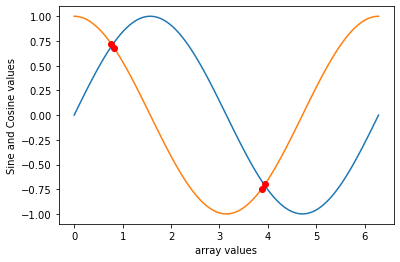

In [9]:
import matplotlib.pyplot as plt
arr = np.linspace(0, 2*np.pi, 100)
#print(arr, end='\n')

#10th elem
ten_elems = arr[::10]
print('\nEvery tenth element: \n', ten_elems)

#reverse array
reversed_array = arr[::-1]
#print(reversed_array)

#extract if sin - cos less than 0.1
sin_arr = np.sin(arr)
cos_arr = np.cos(arr)
diff = np.abs(sin_arr - cos_arr)

mask = (diff<0.1)
close_elems = arr[mask]
print('\nExtracted elems with close sin ans cos results: \n', close_elems)

#Plot
plt.plot(arr, sin_arr)
plt.plot(arr, cos_arr)
plt.plot(close_elems, np.cos(close_elems), 'ro')
plt.xlabel('array values')
plt.ylabel('Sine and Cosine values')
plt.show()


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [10]:
nums = np.arange(10) +1
broad_mult = np.tile(nums, (10, 1))
broad_nums = np.tile(nums, (10, 1)).T

table = nums.T * broad_nums
print(table)

#Anto diagonal
anto = np.zeros(10)
for i in range(10):
    x = i
    y = 9 - i
    anto[i] = table[x, y]

print('\nAnto Diagonal: \n', anto)

#Diagonal offset
offset = np.zeros(9)
for i in range(9):
    x = i
    y = x+1
    offset[i] = table[x, y]

print('\nOffset Diagonal: \n', offset)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Anto Diagonal: 
 [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]

Offset Diagonal: 
 [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [15]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
broad_dist = np.tile(dist, (len(dist), 1))
broad_dist_T = broad_dist.T

dist_grid_miles = broad_dist_T - broad_dist
dist_grid_km = dist_grid_miles * 1.60934

print(dist_grid_miles)
#print(dist_grid_km)


[[    0  -198  -303  -736  -871 -1175 -1475 -1544 -1913 -2448]
 [  198     0  -105  -538  -673  -977 -1277 -1346 -1715 -2250]
 [  303   105     0  -433  -568  -872 -1172 -1241 -1610 -2145]
 [  736   538   433     0  -135  -439  -739  -808 -1177 -1712]
 [  871   673   568   135     0  -304  -604  -673 -1042 -1577]
 [ 1175   977   872   439   304     0  -300  -369  -738 -1273]
 [ 1475  1277  1172   739   604   300     0   -69  -438  -973]
 [ 1544  1346  1241   808   673   369    69     0  -369  -904]
 [ 1913  1715  1610  1177  1042   738   438   369     0  -535]
 [ 2448  2250  2145  1712  1577  1273   973   904   535     0]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [43]:
import numpy as np

In [66]:
N = 100
nums = np.arange(1, N)
bool_mask = np.ones(len(nums), dtype=bool)

for pos, num in enumerate(nums):
    if bool_mask[pos] == False: continue
    if num == 1: continue
    bool_mask[nums%num==0] = False
    bool_mask[pos] = True

print(nums[bool_mask])

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
26.3 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


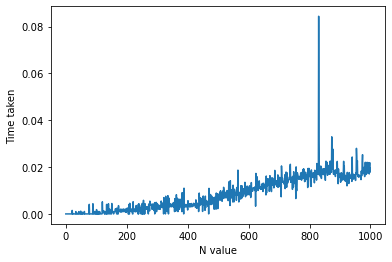

In [43]:
import time
import matplotlib.pyplot as plt

def find_primes(N):
    nums = np.arange(N).reshape((1, N))
    bool_mask = np.ones((1, N), dtype=bool)

    for count, num in enumerate(nums[0]):
        for possible_mult in nums[0][2:count]:
            if possible_mult == num: continue
            if num % possible_mult == 0:
                bool_mask[0][count] = False
                break

    primes = nums[bool_mask]
    return primes

print(find_primes(100))
%timeit find_primes(1000)

times = []
for N in range(1000):
    initial = time.time()
    find_primes(N)
    final = time.time()
    times.append(final-initial)

xvals = [x for x in range(1000)]
plt.plot(xvals, times)
plt.xlabel('N value')
plt.ylabel('Time taken')
plt.show()

In [50]:
#Erastothenes method
N = 100
nums = [x for x in range(2, N)]

p = 2
while p != nums[-1]:
    for num in nums:
        if num == p: continue
        if num % p == 0: nums.remove(num)
    p = nums[nums.index(p) + 1]
print(nums)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [36]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = npr.choice([1, -1], (1000, 200))
print(np.shape(data))

(1000, 200)


In [25]:
arr = npr.randint(-1, 1, (1000, 200))
arr[arr==0] = 1
print(arr)
print(np.shape(arr))

[[ 1 -1  1 ...  1 -1 -1]
 [ 1  1  1 ... -1 -1  1]
 [ 1  1 -1 ...  1 -1 -1]
 ...
 [ 1 -1 -1 ...  1  1 -1]
 [ 1 -1 -1 ...  1 -1  1]
 [-1 -1  1 ...  1  1 -1]]
(1000, 200)


In [31]:
dist = np.zeros((1000, 200))

for col in range(200):
    if col == 0: 
        dist[:, col] = arr[:, col]
        continue
    dist[:, col] = arr[:, col] + dist[:, col-1]

print(dist)


[[  1.   0.   1. ... -10. -11. -12.]
 [  1.   2.   3. ...   2.   1.   2.]
 [  1.   2.   1. ...  -2.  -3.  -4.]
 ...
 [  1.   0.  -1. ...   8.   9.   8.]
 [  1.   0.  -1. ... -26. -27. -26.]
 [ -1.  -2.  -1. ...  16.  17.  16.]]


In [32]:
dist_sq = np.square(dist)
print(dist_sq)

[[  1.   0.   1. ... 100. 121. 144.]
 [  1.   4.   9. ...   4.   1.   4.]
 [  1.   4.   1. ...   4.   9.  16.]
 ...
 [  1.   0.   1. ...  64.  81.  64.]
 [  1.   0.   1. ... 676. 729. 676.]
 [  1.   4.   1. ... 256. 289. 256.]]


In [34]:
dist_mean = dist_sq.mean(axis=0)
print(len(dist_mean))

200


In [40]:
len(np.sqrt(dist_mean))

200

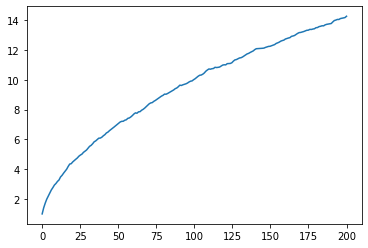

In [42]:
y = np.sqrt(dist_mean)
x = np.linspace(0, 200, 200)

plt.plot(x, y)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [15]:
data = np.loadtxt('populations.txt')
data = data.T
print(data)

[[ 1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
   1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
   1920.]
 [30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
  27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
  24700.]
 [ 4000.  6100.  9800. 35200. 59400. 41700. 19000. 13000.  8300.  9100.
   7400.  8000. 12300. 19500. 45700. 51100. 29700. 15800.  9700. 10100.
   8600.]
 [48300. 48200. 41500. 38200. 40600. 39800. 38600. 42300. 44500. 42100.
  46000. 46800. 43800. 40900. 39400. 39000. 36700. 41800. 43300. 41300.
  47300.]]


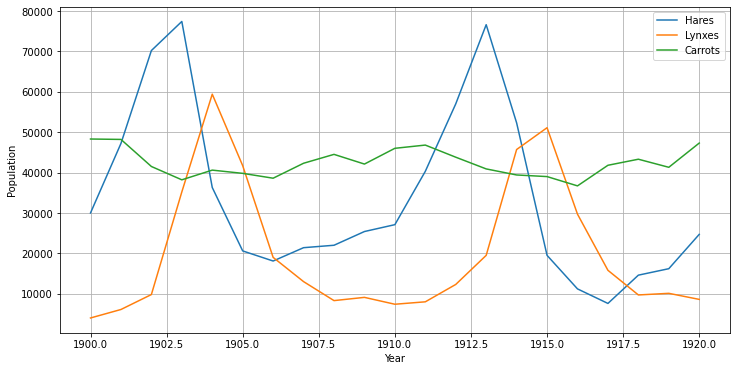

In [30]:
years, hares, lynxes, carrots = data[0], data[1], data[2], data[3]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

In [92]:
mean_h, mean_l, mean_c = hares.mean(), lynxes.mean(), carrots.mean()
std_h, std_l, std_c = hares.std(), lynxes.std(), carrots.std()

print(mean_h, mean_l, mean_c)
print(std_h, std_l, std_c)

hl_corr = np.corrcoef(hares, lynxes)
lc_corr = np.corrcoef(lynxes, carrots)
hc_corr = np.corrcoef(hares, carrots)

print(hl_corr, '\n\n', lc_corr, '\n\n', hc_corr)

34080.95238095238 20166.666666666668 42400.0
20897.906458089667 16254.591536908763 3322.5062255844787
[[1.         0.07189206]
 [0.07189206 1.        ]] 

 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]] 

 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]


In [50]:
max_pop = {}
for pos, year in enumerate(years):
    hare_pop, lynx_pop, carrot_pop = hares[pos], lynxes[pos], carrots[pos]
    mpop = max(hare_pop, lynx_pop, carrot_pop)
    if mpop == hare_pop: max_pop[year] = ['Hare', hare_pop]
    elif mpop == lynx_pop: max_pop[year] = ['Lynx', lynx_pop]
    else: max_pop[year] = ['Carrot', carrot_pop]

print(max_pop)


{1900.0: ['Carrot', 48300.0], 1901.0: ['Carrot', 48200.0], 1902.0: ['Hare', 70200.0], 1903.0: ['Hare', 77400.0], 1904.0: ['Lynx', 59400.0], 1905.0: ['Lynx', 41700.0], 1906.0: ['Carrot', 38600.0], 1907.0: ['Carrot', 42300.0], 1908.0: ['Carrot', 44500.0], 1909.0: ['Carrot', 42100.0], 1910.0: ['Carrot', 46000.0], 1911.0: ['Carrot', 46800.0], 1912.0: ['Hare', 57000.0], 1913.0: ['Hare', 76600.0], 1914.0: ['Hare', 52300.0], 1915.0: ['Lynx', 51100.0], 1916.0: ['Carrot', 36700.0], 1917.0: ['Carrot', 41800.0], 1918.0: ['Carrot', 43300.0], 1919.0: ['Carrot', 41300.0], 1920.0: ['Carrot', 47300.0]}


[48300.0, 48200.0, 70200.0, 77400.0, 59400.0, 41700.0, 38600.0, 42300.0, 44500.0, 42100.0, 46000.0, 46800.0, 57000.0, 76600.0, 52300.0, 51100.0, 36700.0, 41800.0, 43300.0, 41300.0, 47300.0]


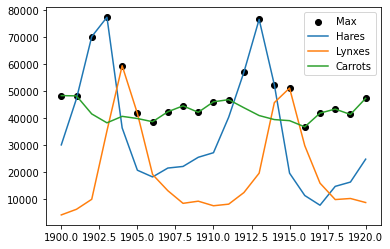

In [84]:
maxvals = [max(a, c, b) for (a, b, c) in zip(hares, lynxes, carrots)]
print(maxvals)

plt.scatter(years, maxvals, label='Max', c='Black')
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes')
plt.plot(years, carrots, label='Carrots')
plt.legend()